# Analyze a Dataset and use Random Forest to Dermine the price of the car depending their features

source: https://www.kaggle.com/datasets/kreeshrajani/used-car-price-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('used_car_dataset.csv')
data.head()




,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [2]:
duplicates = data.duplicated()
print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 92


In [3]:

print(data.isnull().sum())

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64


In [4]:
print("Number of unique cars:", data['car_name'].nunique())
print("Summary statistics for car prices:", data['car_price_in_rupees'].describe())
print("Number of cars in each fuel type:", data['fuel_type'].value_counts())

Number of unique cars: 946
Summary statistics for car prices: count            2105
unique            811
top       ₹ 4.75 Lakh
freq               23
Name: car_price_in_rupees, dtype: object
Number of cars in each fuel type: Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64


## Cleaning All columns

Creating a functiont to clean the prince

In [5]:
def clean_car_price(price):
    if 'Lakh' in price:
        return float(price.replace('₹', '').replace('Lakh', '').replace(',','').strip()) * 100000
    elif 'Crore' in price:
        return float(price.replace('₹', '').replace('Crore', '').replace(',','').strip()) * 10000000
    else:
        return float(price.replace('₹', '').replace(',','').strip())


data['car_price_in_rupees'] = data['car_price_in_rupees'].apply(clean_car_price)
data['car_price_in_rupees'] = data['car_price_in_rupees'].astype('int')


print(data)

                                               car_name  car_price_in_rupees  \
0     Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...               445000   
1                            Maruti Suzuki Alto 800 Lxi               293000   
2                               Tata Safari XZ Plus New              2249000   
3                               Maruti Suzuki Ciaz ZXI+               695000   
4        Jeep Compass Sport Plus 1.4 Petrol [2019-2020]              1200000   
...                                                 ...                  ...   
2100                         Ford Figo Titanium1.5 TDCi               360000   
2101                    MINI Cooper Countryman Cooper D              2200000   
2102                          Hyundai Verna 1.6 VTVT SX               838000   
2103                         Maruti Suzuki Ciaz VXi+ AT               675000   
2104                          Hyundai Verna 1.6 VTVT SX               876000   

     kms_driven fuel_type       city  y

Same for km column

In [6]:
def clean_kms(kms):
    return int(kms.replace(',', '').split(' ')[0])

# apply the function to the kms_driven column
data['kms_driven'] = data['kms_driven'].apply(clean_kms)

# print the dataframe
print(data)

                                               car_name  car_price_in_rupees  \
0     Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...               445000   
1                            Maruti Suzuki Alto 800 Lxi               293000   
2                               Tata Safari XZ Plus New              2249000   
3                               Maruti Suzuki Ciaz ZXI+               695000   
4        Jeep Compass Sport Plus 1.4 Petrol [2019-2020]              1200000   
...                                                 ...                  ...   
2100                         Ford Figo Titanium1.5 TDCi               360000   
2101                    MINI Cooper Countryman Cooper D              2200000   
2102                          Hyundai Verna 1.6 VTVT SX               838000   
2103                         Maruti Suzuki Ciaz VXi+ AT               675000   
2104                          Hyundai Verna 1.6 VTVT SX               876000   

      kms_driven fuel_type       city  

In [7]:
data.dtypes

car_name               object
car_price_in_rupees     int32
kms_driven              int64
fuel_type              object
city                   object
year_of_manufacture     int64
dtype: object

Reunir les types dessences entre eux ( petrole , gaz et autres )

In [8]:
def categorize_fuel(fuel):
    if fuel in ['Petrol','Petrol + 1']:
        return 'Pétrole'
    elif fuel in ['Diesel', 'CNG', 'LPG','Diesel + 1 ']:
        return 'Gaz'
    elif fuel in ['Hybrid', 'Electric']:
        return 'Ecolo'
    else:
        return 'Autre'

data['fuel_type'] = data['fuel_type'].apply(categorize_fuel)

data

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000,22402,Pétrole,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,293000,10344,Pétrole,Kolkata,2019
2,Tata Safari XZ Plus New,2249000,12999,Gaz,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,695000,45000,Pétrole,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000,11193,Pétrole,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,360000,42158,Gaz,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,2200000,68862,Gaz,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,838000,37622,Pétrole,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,675000,64726,Pétrole,Mumbai,2017


Get the  brand of each car . Using a mask to get each brand

In [9]:
brands = [ 'Chevrolet','Datsun','Fiat', 'Maruti Suzuki', 'Tata', 'Hyundai', 'Toyota', 'Mahindra', 'Kia', 'BMW', 'Mercedes-Benz', 'Land Rover', 'Skoda', 'Honda', 'MG', 'Volkswagen', 'Audi', 'Volvo', 'Jaguar', 'Jeep', 'Citroen', 'Porsche', 'Nissan', 'Renault', 'Lamborghini', 'Lexus', 'Rolls-Royce', 'MINI', 'Tesla', 'Ferrari', 'BYD', 'Maserati', 'McLaren', 'Isuzu', 'Bugatti', 'Bentley', 'Force Motors', 'Aston Martin', 'OLA', 'Pravaig', 'Fisker', 'Mean Metal Motors','Ford']



brand_mask = data['car_name'].str.contains('|'.join(brands), case=False)


data['brand'] = data['car_name'][brand_mask].str.extract(f"({'|'.join(brands)})", expand=False)


data['brand'].fillna('Other', inplace=True)

data


,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000,22402,Pétrole,Mumbai,2016,Hyundai
1,Maruti Suzuki Alto 800 Lxi,293000,10344,Pétrole,Kolkata,2019,Maruti Suzuki
2,Tata Safari XZ Plus New,2249000,12999,Gaz,Bangalore,2021,Tata
3,Maruti Suzuki Ciaz ZXI+,695000,45000,Pétrole,Thane,2016,Maruti Suzuki
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000,11193,Pétrole,Kolkata,2019,Jeep
...,...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,360000,42158,Gaz,Kolkata,2015,Ford
2101,MINI Cooper Countryman Cooper D,2200000,68862,Gaz,Hyderabad,2013,MINI
2102,Hyundai Verna 1.6 VTVT SX,838000,37622,Pétrole,Chennai,2018,Hyundai
2103,Maruti Suzuki Ciaz VXi+ AT,675000,64726,Pétrole,Mumbai,2017,Maruti Suzuki


In [10]:
# check if all cars got a brand name
unique_brands = data['brand'].unique()


for brand in unique_brands:
    print(brand)

Hyundai
Maruti Suzuki
Tata
Jeep
Toyota
Renault
Chevrolet
Mercedes-Benz
Ford
Porsche
Kia
BMW
Honda
Audi
MG
Skoda
Volkswagen
Volvo
Mahindra
Nissan
Land Rover
Isuzu
Jaguar
MINI
Datsun
Fiat
Citroen
Bentley


In [11]:
## i get rows with brand = " other" so i checked which column it was and add some correction in the mask ( it was fiat , chevrolet and datsun)
#other_rows = data[data['brand'] == 'Other']
#print(other_rows)

 ## Delete des outliers

In [12]:
# Outliers Price
q1_price = data['car_price_in_rupees'].quantile(0.25)
q3_price = data['car_price_in_rupees'].quantile(0.75)
iqr = q3_price - q1_price


data = data[(data['car_price_in_rupees'] >= q1_price - 1.5*iqr) & (data['car_price_in_rupees'] <= q3_price + 1.5*iqr)].reset_index()
data

,index,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand
0,0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000,22402,Pétrole,Mumbai,2016,Hyundai
1,1,Maruti Suzuki Alto 800 Lxi,293000,10344,Pétrole,Kolkata,2019,Maruti Suzuki
2,3,Maruti Suzuki Ciaz ZXI+,695000,45000,Pétrole,Thane,2016,Maruti Suzuki
3,4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000,11193,Pétrole,Kolkata,2019,Jeep
4,5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000,42906,Pétrole,Chennai,2017,Maruti Suzuki
...,...,...,...,...,...,...,...,...
1868,2099,Hyundai Grand i10 Sports Edition 1.2L Kappa VTVT,450000,66250,Pétrole,Ahmedabad,2014,Hyundai
1869,2100,Ford Figo Titanium1.5 TDCi,360000,42158,Gaz,Kolkata,2015,Ford
1870,2102,Hyundai Verna 1.6 VTVT SX,838000,37622,Pétrole,Chennai,2018,Hyundai
1871,2103,Maruti Suzuki Ciaz VXi+ AT,675000,64726,Pétrole,Mumbai,2017,Maruti Suzuki


In [13]:
# Outliers Kms
q1_price = data['kms_driven'].quantile(0.25)
q3_price = data['kms_driven'].quantile(0.75)
iqr = q3_price - q1_price


data = data[(data['kms_driven'] >= q1_price - 1.5*iqr) & (data['kms_driven'] <= q3_price + 1.5*iqr)].reset_index()
data

,level_0,index,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand
0,0,0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000,22402,Pétrole,Mumbai,2016,Hyundai
1,1,1,Maruti Suzuki Alto 800 Lxi,293000,10344,Pétrole,Kolkata,2019,Maruti Suzuki
2,2,3,Maruti Suzuki Ciaz ZXI+,695000,45000,Pétrole,Thane,2016,Maruti Suzuki
3,3,4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000,11193,Pétrole,Kolkata,2019,Jeep
4,4,5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000,42906,Pétrole,Chennai,2017,Maruti Suzuki
...,...,...,...,...,...,...,...,...,...
1830,1868,2099,Hyundai Grand i10 Sports Edition 1.2L Kappa VTVT,450000,66250,Pétrole,Ahmedabad,2014,Hyundai
1831,1869,2100,Ford Figo Titanium1.5 TDCi,360000,42158,Gaz,Kolkata,2015,Ford
1832,1870,2102,Hyundai Verna 1.6 VTVT SX,838000,37622,Pétrole,Chennai,2018,Hyundai
1833,1871,2103,Maruti Suzuki Ciaz VXi+ AT,675000,64726,Pétrole,Mumbai,2017,Maruti Suzuki


EDA with all of the graphs 

In [14]:
# Explore car_price_in_rupees column
print(data['car_price_in_rupees'].describe())



count    1.835000e+03
mean     7.616996e+05
std      4.277887e+05
min      6.000000e+04
25%      4.535000e+05
50%      6.500000e+05
75%      9.289990e+05
max      2.150000e+06
Name: car_price_in_rupees, dtype: float64


Normalize the column price/ kilometers

In [15]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['car_price_in_rupees_Norm'] = scaler.fit_transform(data[['car_price_in_rupees']])
data['kms_driven_Norm'] = scaler.fit_transform(data[['kms_driven']])
data

,level_0,index,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,brand,car_price_in_rupees_Norm,kms_driven_Norm
0,0,0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000,22402,Pétrole,Mumbai,2016,Hyundai,0.184211,0.187815
1,1,1,Maruti Suzuki Alto 800 Lxi,293000,10344,Pétrole,Kolkata,2019,Maruti Suzuki,0.111483,0.086433
2,2,3,Maruti Suzuki Ciaz ZXI+,695000,45000,Pétrole,Thane,2016,Maruti Suzuki,0.303828,0.377817
3,3,4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000,11193,Pétrole,Kolkata,2019,Jeep,0.545455,0.093571
4,4,5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000,42906,Pétrole,Chennai,2017,Maruti Suzuki,0.149282,0.360211
...,...,...,...,...,...,...,...,...,...,...,...
1830,1868,2099,Hyundai Grand i10 Sports Edition 1.2L Kappa VTVT,450000,66250,Pétrole,Ahmedabad,2014,Hyundai,0.186603,0.556484
1831,1869,2100,Ford Figo Titanium1.5 TDCi,360000,42158,Gaz,Kolkata,2015,Ford,0.143541,0.353921
1832,1870,2102,Hyundai Verna 1.6 VTVT SX,838000,37622,Pétrole,Chennai,2018,Hyundai,0.372249,0.315783
1833,1871,2103,Maruti Suzuki Ciaz VXi+ AT,675000,64726,Pétrole,Mumbai,2017,Maruti Suzuki,0.294258,0.543671


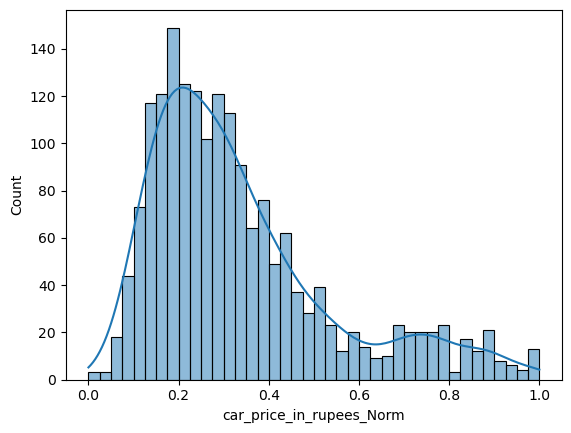

In [16]:

sns.histplot(data['car_price_in_rupees_Norm'], bins=40, kde=True)
plt.show()

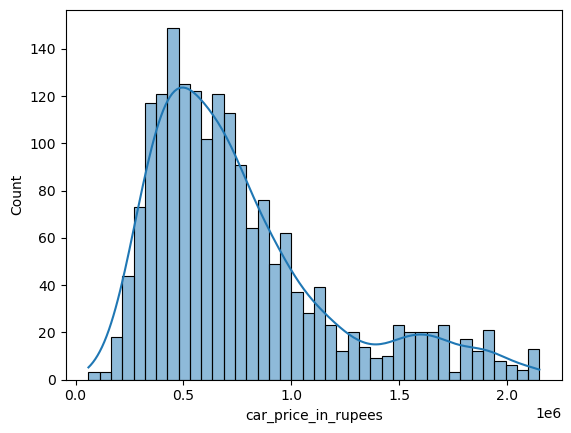

In [29]:
sns.histplot(data['car_price_in_rupees'], bins=40, kde=True)
plt.show()

count      1835.000000
mean      44986.264850
std       24400.284675
min          64.000000
25%       25051.500000
50%       43000.000000
75%       62000.000000
max      119000.000000
Name: kms_driven, dtype: float64


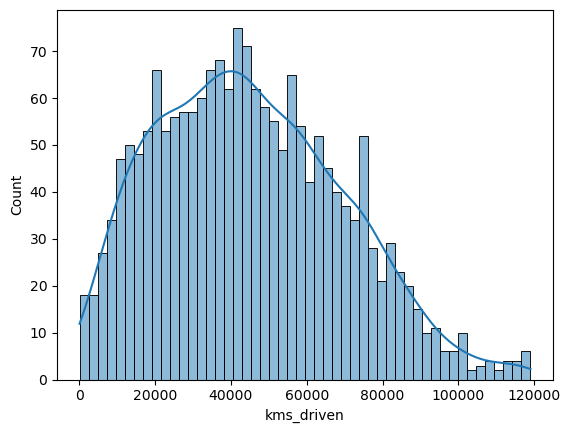

In [17]:
print(data['kms_driven'].describe())

# Create a histogram of kilometers driven
sns.histplot(data['kms_driven'], bins=50, kde=True)
plt.show()



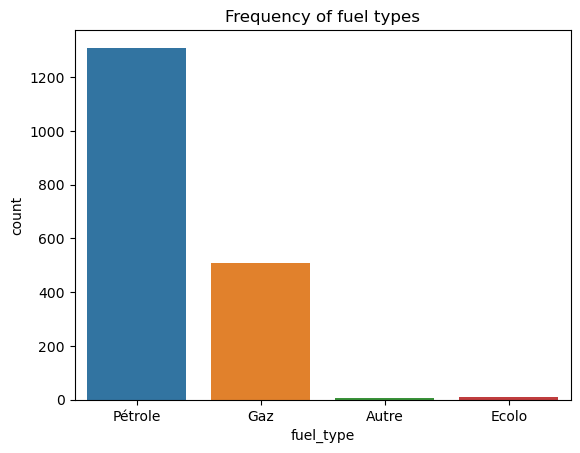

In [18]:
# Explore fuel_type column
sns.countplot(x=data['fuel_type'])
plt.title('Frequency of fuel types')
plt.show()

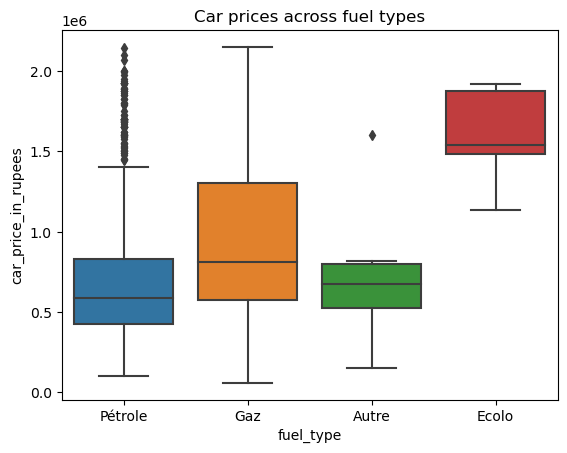

In [19]:
# Compare car prices across different fuel types
sns.boxplot(x=data['fuel_type'], y=data['car_price_in_rupees'])
plt.title('Car prices across fuel types')
plt.show()

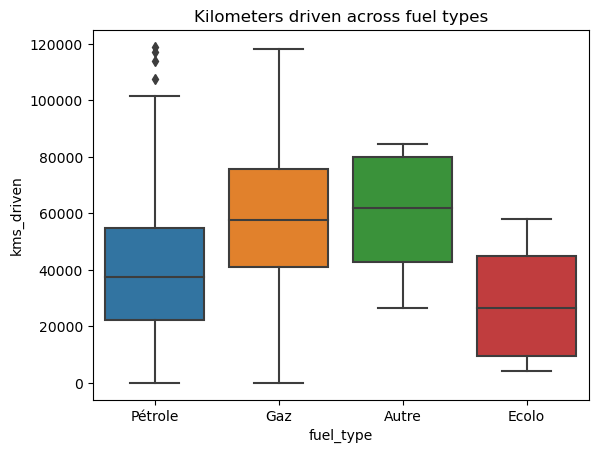

In [20]:
# Compare kilometers driven across different fuel types
sns.boxplot(x=data['fuel_type'], y=data['kms_driven'])
plt.title('Kilometers driven across fuel types')
plt.show()

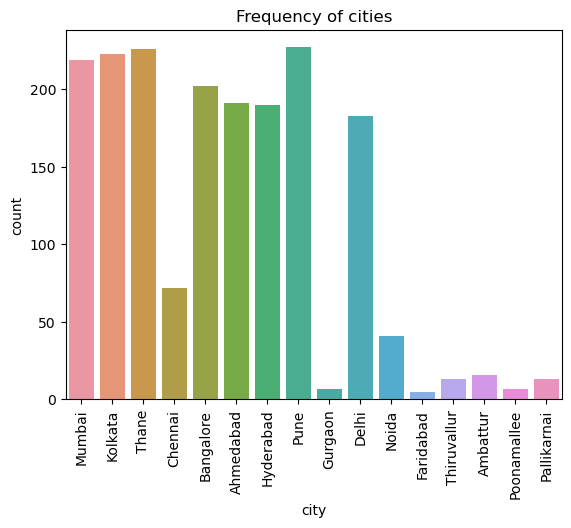

In [35]:
# Explore city column
sns.countplot(x=data['city'])

plt.title('Frequency of cities')
plt.xticks(rotation=90, ha='center')
plt.show()


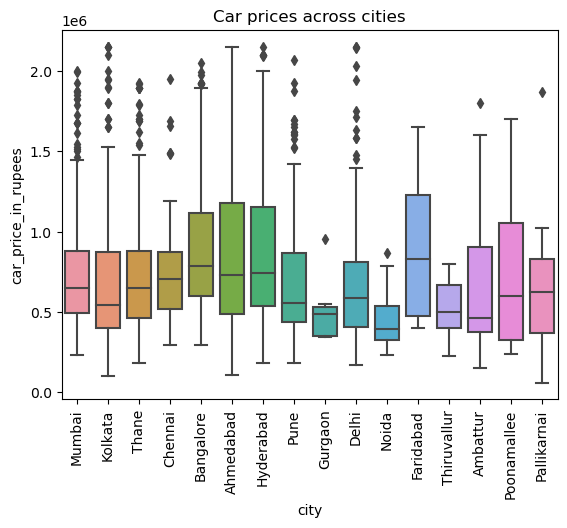

In [34]:
# Compare car prices across different cities
sns.boxplot(x=data['city'], y=data['car_price_in_rupees'])
plt.title('Car prices across cities')
plt.xticks(rotation=90, ha='center')
plt.show()

c:\Users\yskon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


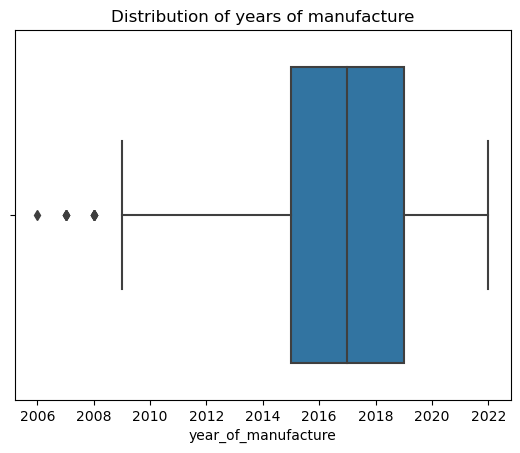

count    1835.000000
mean     2016.936240
std         2.765808
min      2006.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2022.000000
Name: year_of_manufacture, dtype: float64

In [23]:
# Explore year_of_manufacture column
sns.boxplot(data['year_of_manufacture'])
plt.title('Distribution of years of manufacture')
plt.show()
data['year_of_manufacture'].describe()

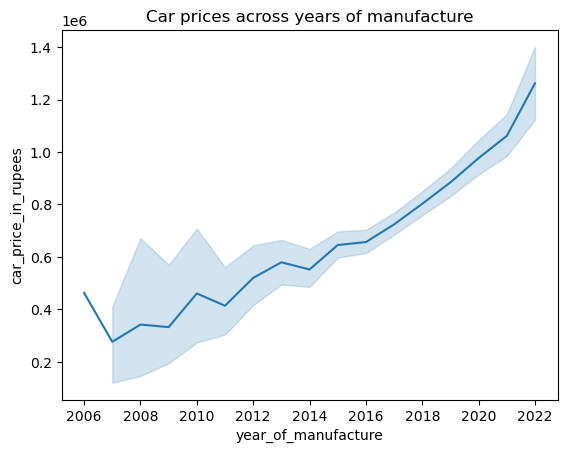

In [24]:
# Compare car prices across different years of manufacture
sns.lineplot(x=data['year_of_manufacture'], y=data['car_price_in_rupees'])
plt.title('Car prices across years of manufacture')
plt.show()

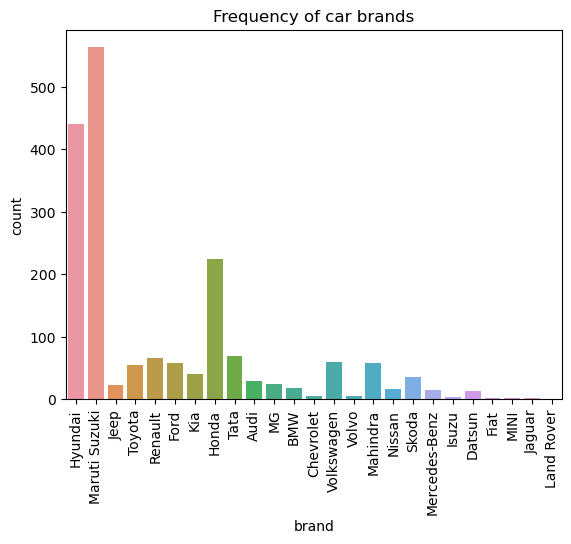

In [33]:
# Explore brand column
sns.countplot(x=data['brand'])
plt.title('Frequency of car brands')
plt.xticks(rotation=90, ha='center')
plt.show()

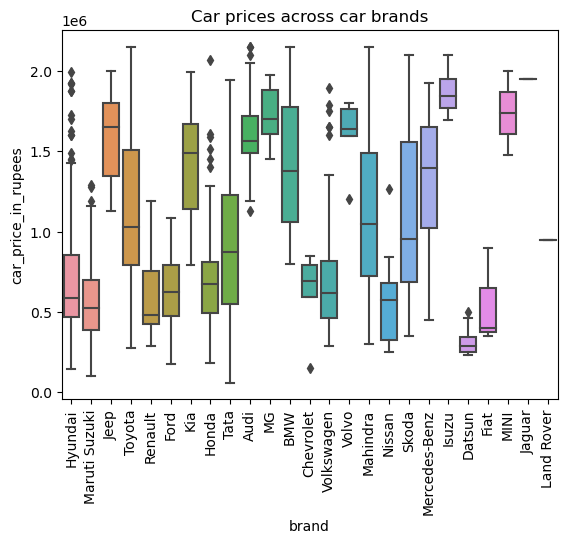

In [31]:
# Compare car prices across different brands
sns.boxplot(x=data['brand'], y=data['car_price_in_rupees'])
plt.title('Car prices across car brands')
plt.xticks(rotation=90, ha='center')
plt.show()

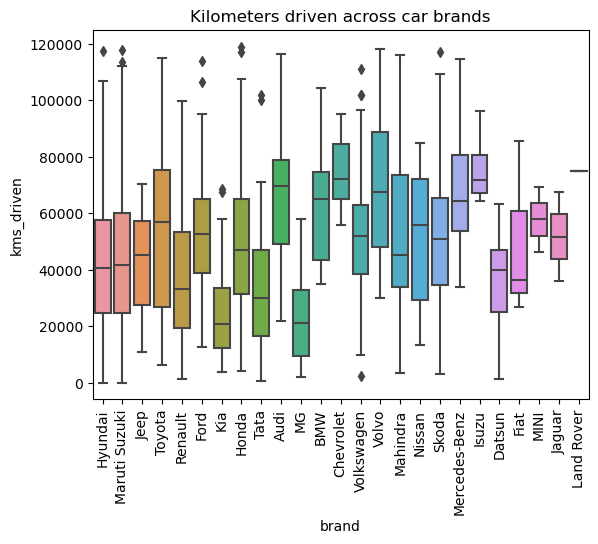

In [32]:
# Compare kilometers driven across different brands
sns.boxplot(x=data['brand'], y=data['kms_driven'])
plt.title('Kilometers driven across car brands')
plt.xticks(rotation=90, ha='center')
plt.show()

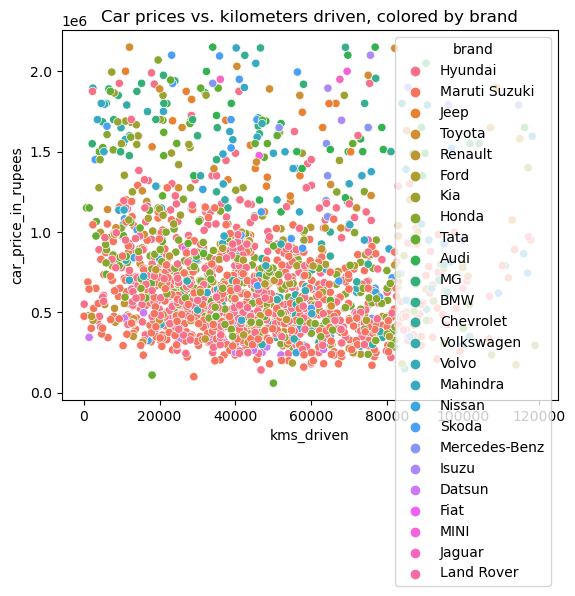

In [28]:
# Create a scatter plot of car prices vs. kilometers driven, colored by brand
sns.scatterplot(x=data['kms_driven'], y=data['car_price_in_rupees'], hue=data['brand'])
plt.title('Car prices vs. kilometers driven, colored by brand')
plt.show()

###  prepare fuel type as number to process machine learning

In [43]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Fit and transform the categorical column into numeric values
data['fuel_type_numeric'] = le.fit_transform(data['fuel_type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Autre': 0, 'Ecolo': 1, 'Gaz': 2, 'Pétrole': 3}


In [45]:
data.corr()

,level_0,index,car_price_in_rupees,kms_driven,year_of_manufacture,car_price_in_rupees_Norm,kms_driven_Norm,fuel_type_numeric
level_0,1.000000,0.999968,0.013180,-0.009175,0.001412,0.013180,-0.009175,-0.001272
index,0.999968,1.000000,0.012871,-0.009088,0.001349,0.012871,-0.009088,-0.001233
car_price_in_rupees,0.013180,0.012871,1.000000,-0.110773,0.403318,1.000000,-0.110773,-0.310354
kms_driven,-0.009175,-0.009088,-0.110773,1.000000,-0.539890,-0.110773,1.000000,-0.312106
year_of_manufacture,0.001412,0.001349,0.403318,-0.539890,1.000000,0.403318,-0.539890,0.022590
car_price_in_rupees_Norm,0.013180,0.012871,1.000000,-0.110773,0.403318,1.000000,-0.110773,-0.310354
kms_driven_Norm,-0.009175,-0.009088,-0.110773,1.000000,-0.539890,-0.110773,1.000000,-0.312106
fuel_type_numeric,-0.001272,-0.001233,-0.310354,-0.312106,0.022590,-0.310354,-0.312106,1.000000


# Machine Learning 

### Linear Regression 

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



# Define the features and the target
features = ['kms_driven_Norm', 'fuel_type_numeric', 'year_of_manufacture']
target = 'car_price_in_rupees'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Fit a linear regression model to the training data
lr = LinearRegression()
lr.fit(train_data[features], train_data[target])

# Evaluate the performance of the model on the testing data
y_pred = lr.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_pred)
print('Mean squared error:', mse)



Mean squared error: 150048522337.69388


In [53]:
# Get the score of the model on the test data
score =lr.score(train_data[features],train_data[target])

# Print the score
print("Model score:", score)

Model score: 0.26862442264868314


the score dont satistfy me , the dataset was noisy , so lets test it 

In [49]:
# test 

new_data = pd.DataFrame({
    'kms_driven_Norm': [0.5],
    'fuel_type_numeric': [2],
    'year_of_manufacture': [2010]
})
new_data[features] = scaler.transform(new_data[features])
predicted_price = lr.predict(new_data[features])[0]
print('Predicted car price:', predicted_price)

Predicted car price: 491955.61297937366


Seems not to dumb , lets try a grid search to improve the model 

In [56]:
from sklearn.model_selection import GridSearchCV


param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False],
              'copy_X': [True, False]}


grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(train_data[features], train_data[target])


print("Best hyperparameters: ", grid_search.best_params_)
print("Mean squared error score: ", -grid_search.best_score_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Mean squared error score:  131541344332.09033


c:\Users\yskon\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\yskon\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Regression linear seems not to persuasive , i achieve the improvement of this linear regression , a way better , but let see with classification tree 

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


features = ['kms_driven_Norm', 'fuel_type_numeric', 'year_of_manufacture']
target = 'car_price_in_rupees'


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])


dtc = DecisionTreeClassifier()
dtc.fit(train_data[features], train_data[target])


y_pred = dtc.predict(test_data[features])
accuracy = accuracy_score(test_data[target], y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.09536784741144415


In [65]:
# hyperparameters to tune
params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search 
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    scoring='accuracy',
)
grid_search.fit(train_data[features], train_data[target])
print('Best hyperparameters:', grid_search.best_params_)

#  decision tree classifier using the best hyperparameters
dtc = DecisionTreeClassifier(**grid_search.best_params_)
dtc.fit(train_data[features], train_data[target])

# Evaluate the performance 
y_pred = dtc.predict(test_data[features])
accuracy = accuracy_score(test_data[target], y_pred)
print('Accuracy:', accuracy)

c:\Users\yskon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.013623978201634877
